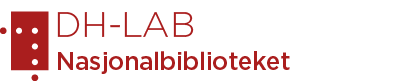

In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline
import dhlab.module_update as mu
import warnings
warnings.filterwarnings('ignore')
mu.css()

# Kollokasjoner eller assosiasjoner

I denne notebooken viser vi eksempler på undersøkelser man kan gjøre for å finne ut hvilke ord et ord opptrer sammen med innenfor et korpus.

## 1. Konstruer et korpus med Dewey

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for andre måter å definere korpus.

For å finne relevant dewey-klassifikasjon kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

In [2]:
# korpus med inntil 200 bøker fra dewey 641.2 (drikkevarer) utgitt mellom 1960 og 2020

korpus = nb.book_urn(ddk='641.2%', period=(1960, 2020), limit=200)

Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.

In [3]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2010062808033,"Olaf-Hansen, Erik",Drikk vin,1995
1,2011022403023,"Bølgen, Toralf",Bølgen &amp; Mois store bok om mat og vin,2010
2,2014061848144,"Bø, Merete",Vinens vinnere 2010,2009
3,2016102748002,"Hagerup, Klaus",Svarte haner &amp; ville griser,2005
4,2016072948039,"Johansen, Vidar Kenneth",Spansk vin,2005
5,2011032108037,"Jørgensen, Helge",Ansvarlig vertskap,2003
6,2013121305020,"Teien, Thor Richard",Hva skal vi ha i glasset?,1979
7,2010061603006,"Laurin, Urban",Whisky fra hele verden,1998
8,2016010807509,"Gravdal, Tove",Ett år i Champagne,2002
9,2011021603028,"Salvesen, Geir",Himmelske kombinasjoner,2010


## 2. Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### 2.1. Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [4]:
collword = 'rødvin'

In [5]:
# Vi utfører en konkordans for å sjekke at korpuset virker.

nb.urn_concordance(word = 'sei', urns = korpus, size = 5)

"Bølgen & Mois store bok om mat og vin, Bølgen, Toralf, 2010","eksempel torsk , steinbit eller",sei,1 gulrot
"Bølgen & Mois store bok om mat og vin, Bølgen, Toralf, 2010",1 kg hvit fisk som,sei,", lyr og torsk uten"
"Bølgen & Mois store bok om mat og vin, Bølgen, Toralf, 2010",Ristet,sei,med chablis-sjy og frisk grønn
"Bølgen & Mois store bok om mat og vin, Bølgen, Toralf, 2010",Ristet,sei,med chablis-sjy og frisk grønn
"Håkan Larssons fredagskveld med mat og vin, Larsson, Håkan., 2011","benfri ryggfilet av torsk ,",sei,None
"Vin til maten, Ornäs, Catarina Hiort af, 1995","fiskekoteletter ( av torsk ,",sei,eller hellefisk )
"Historien om de norske akevitter, Dege, Hroar, 1997",markedet for norsk klippfisk av,sei,", lange eller torsk og"
"To på reise, Opsahl, Nils H., 2001",: - Den første som,sei,"fetta no , får med"
"Champagne og musserende vin, Stevenson, Tom, 1999",", es cce c V",sei,__ & & ill 1
"Basic vin, Hess, Reinhardt, 2004",At de i vinsmakingsprøver har,sei,ret over viner fra den
"Akevittviseboken, , 2009",nys å ætter på så,sei,dæm at dæm træng mæ


Så kan vi hente ut selve kollokasjonen, dvs. ord som står innenfor en viss avstand fra målordet.

In [6]:
# Vi legger inn variablen collword som søkeord, med 5 ord før og etter. 
#  Antall ord før og etter kan endres etter konteksten man vil undersøke.
# Collword er lagt som variabel i cella over, slik at det er lett å gjenbruke notebooken for ulike søkeord

coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen ligger i en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [7]:
coll.head(10)

,0
",",3445
.,3113
og,2004
en,1947
er,1229
av,1076
som,1005
med,985
i,982
til,787



### 2.2. Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### 2.2.1. Bokhylla aggregert

In [8]:
tot = nb.frame(nb.totals(top = 50000))

In [9]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### 2.2.2. Aggregert korpus

In [10]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [11]:
korpus_agg = nb.frame_sort(nb.frame(korpus_agg))

In [12]:
korpus_agg.head(10)

,0
",",726324
.,607377
og,370316
i,284037
er,222791
av,189591
som,184028
en,155422
med,126502
til,124112


### 2.3. Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [13]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

True

Inspiser dataene etter normalisering

#### 2.3.1. Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [14]:
korpus_agg.head()

,0
",",0.054256
.,0.045370
og,0.027662
i,0.021217
er,0.016642


#### 2.3.2. Bokhylla total

In [15]:
tot.head()

,0
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


#### 2.3.3. Kollokasjonen

In [16]:
coll.head()

,0
",",0.059955
.,0.054177
og,0.034876
en,0.033884
er,0.021389


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### 2.3.4. Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [17]:
coll_assoc = nb.frame_sort(coll**1.0/tot)

In [18]:
coll_assoc.head(20)

,0
hvitvin,3960.007603
Bordeaux,749.996046
Kraftig,648.341667
rødvin,625.999418
fyldig,547.608600
drikkes,439.053763
Chateau,406.225363
druer,352.523613
saftig,325.682828
portvin,323.403356


#### 2.3.5. Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [19]:
coll_assoc_korp = nb.frame_sort(coll**1.2/korpus_agg)

In [20]:
coll_assoc_korp.head(20)

,0
Karbonader,111.737456
bodeaux,59.797533
vintype:,59.797533
T3IH1in,59.797533
Suffleer,59.797533
tilberedningsform,44.890174
Fettstrukturen,44.813996
fiskefettet,44.694982
Fordeling,38.648895
jordbærsmakende,37.245819


# 3. Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

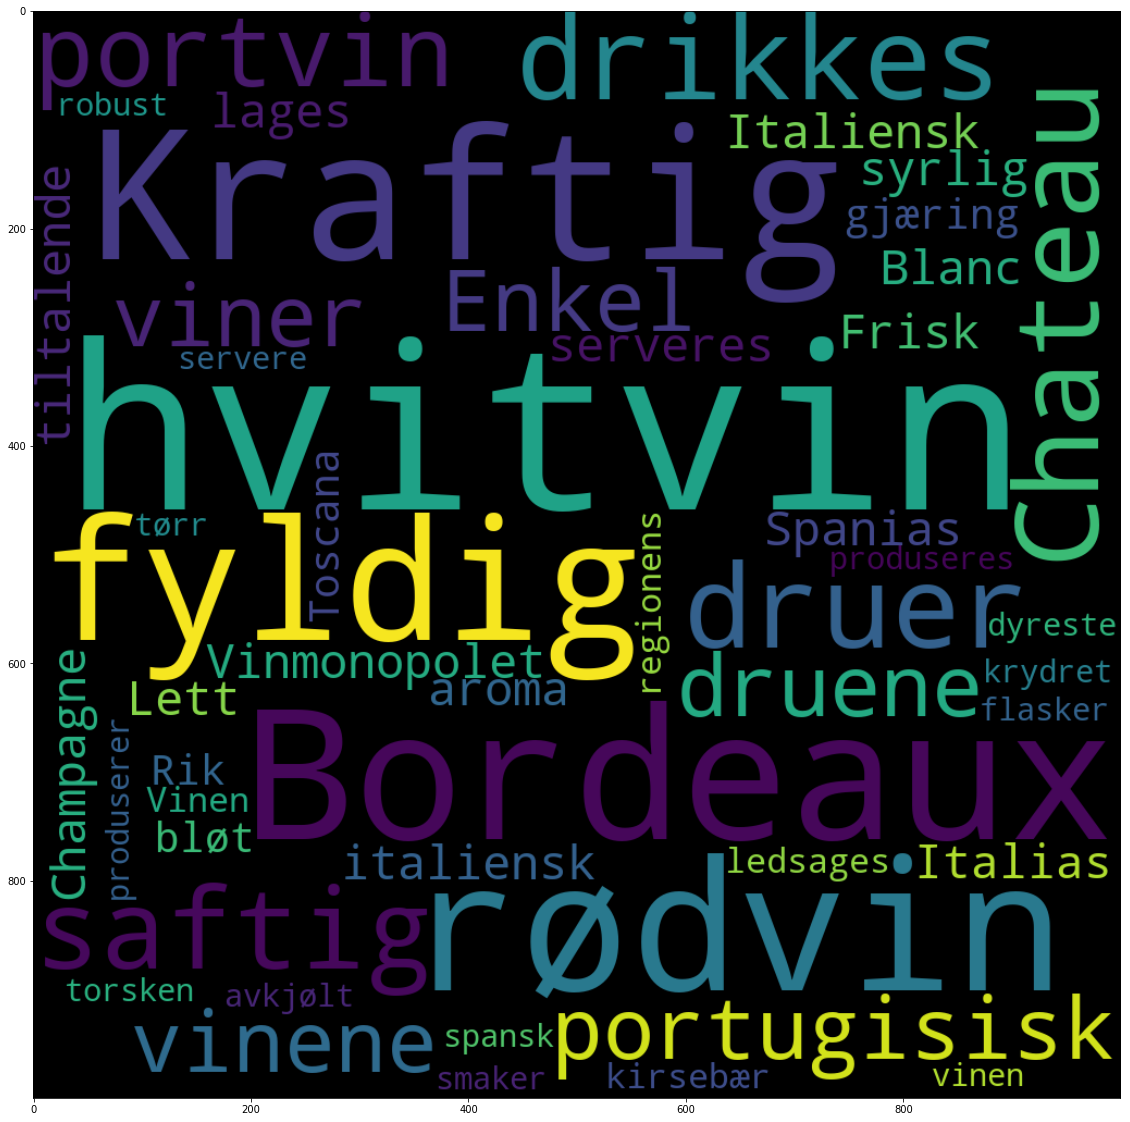

In [21]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin i korpuset vårt, målt mot alle bøker i nb.no 

nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

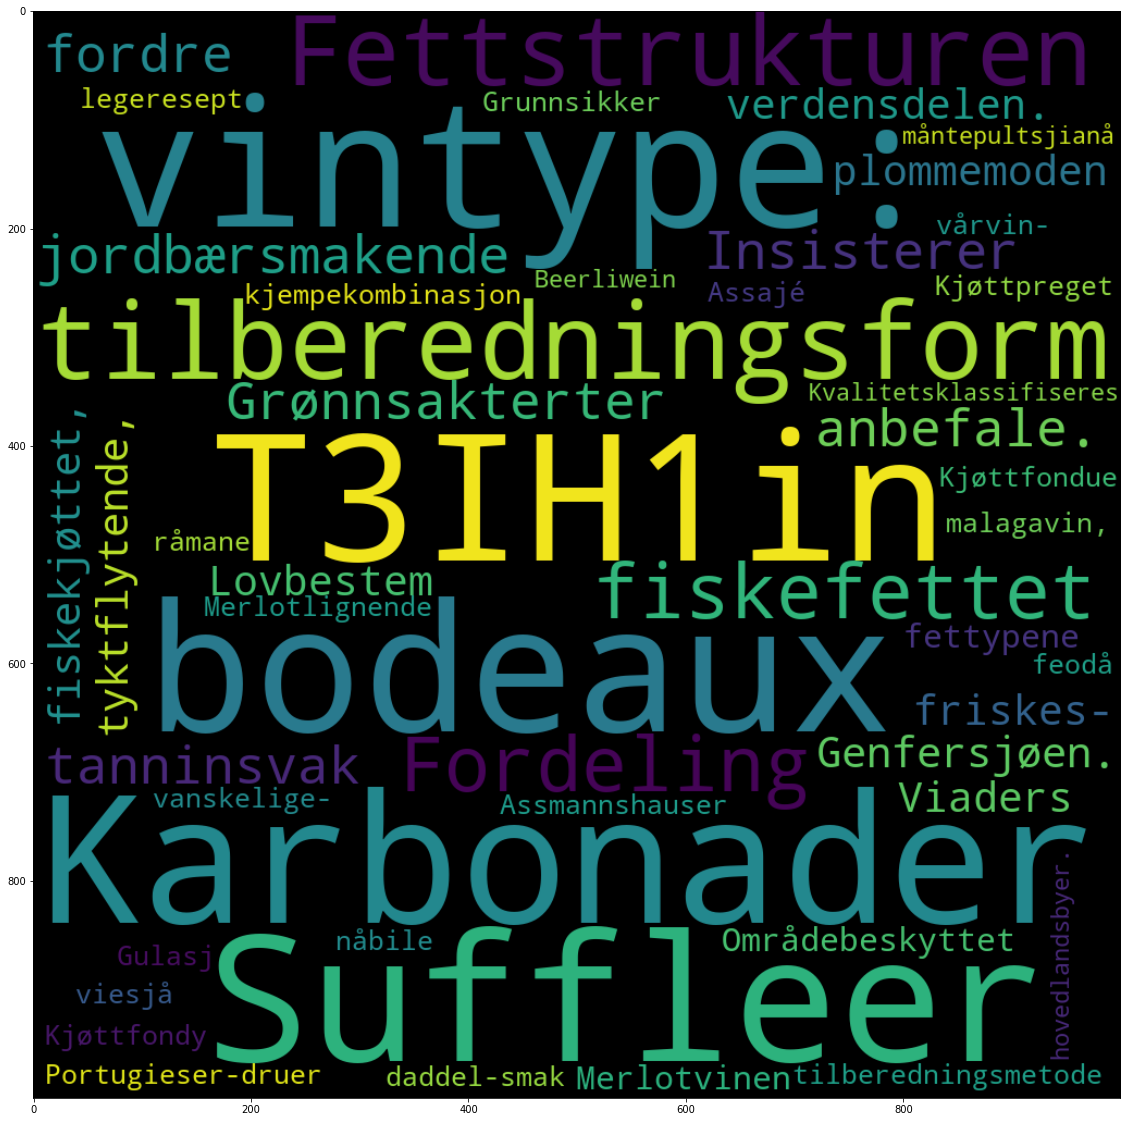

In [22]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin, målt mot hele "Drikkevare"-korpuset

nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## 4. Gjenbruk med andre ord og korpus

1. Bytt ut parametrene i cellen der `korpus` blir definert.
2. Bytt ut ordet som er angitt som `collword`.
3. Gå til `Cell` i menyen og velg `Run All`.

Det er også mulig å først velge `File` og `Make a Copy`, slik at man oppretter en ny notebook før man starter.

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)